# Part A - 30 Marks

• __DOMAIN__:           Medical

• __CONTEXT__:          Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI                             team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets                             to the AI team  b for developing a AIML model which can predict the condition of the patient depending on the received test                               results.

• __DATA DESCRIPTION__: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
                          represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body                           part.
                          
• __PROJECT OBJECTIVE__: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
                         Learning algorithms.
                         
• __STEPS AND TASK [30 Marks]__:

### Q1 : Data Understanding: [5 Marks]Data Understanding: [5 Marks]

__A__. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]


In [1]:
import pandas as pd

dataset_H = pd.read_csv("./Type_H.csv")
dataset_S = pd.read_csv("./Type_S.csv")
dataset_Normal = pd.read_csv("./Normal.csv")

__B__. Print Shape and columns of all the 3 DataFrames. [1 Mark]

In [2]:
print("dataset H")
print(dataset_H.shape, "\n")
print(dataset_H.columns, "\n\n\n")
print("dataset S")
print(dataset_S.shape, "\n")
print(dataset_S.columns, "\n\n")
print("dataset Normal")
print(dataset_Normal.shape, "\n")
print(dataset_Normal.columns, "\n\n")

dataset H
(60, 7) 

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 



dataset S
(150, 7) 

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 


dataset Normal
(100, 7) 

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object') 




__C__. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

All the files have the exact __same__ column __names__.

__D__. Print DataTypes of all the 3 DataFrames. [1 Mark]

In [3]:
print("Dataset H")
print(dataset_H.dtypes, "\n\n\n")
print("Dataset S")
print(dataset_S.dtypes, "\n\n\n")
print("Dataset Normal")
print(dataset_Normal.dtypes, "\n\n\n")

Dataset H
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 



Dataset S
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 



Dataset Normal
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object 





__E__. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

There doesn't appear to be any variation __within__ any of the dataframes, except that some of the values are misspelled,
- In dataset_Normal, __all values__ are __Normal__, but __some are__ spelled __Nrmal__
- In dataset_H, __all values__ are __Type_H__, but __some are__ spelled __type_h__
- In dataset_S, __all values__ are __Type_S__, but __some are__ spelled __tp_s__

__Between__ the three files, __none of them__ share the __same__ value for the feature "Class"

### 2. Data Preparation and Exploration: [5 Marks]

__A__. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

In [4]:
dataset_H["Class"] = "type_H"
dataset_S["Class"] = "type_S"
dataset_Normal["Class"] = "normal"

__B__. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

In [5]:
Dataset = pd.concat([dataset_H, dataset_S, dataset_Normal])
Dataset.shape

(310, 7)

__C__. Print 5 random samples of this DataFrame [1 Marks]

In [6]:
import random
nums = []

for i in range(0,5):
    nums.append(int(random.uniform(0, len(Dataset))))
                
Dataset.iloc[nums, :] 

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
61,83.879941,23.077427,87.141512,60.802514,124.646072,80.555605,type_S
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,type_H
98,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,normal
47,50.160078,-2.970024,42.000000,53.130102,131.802491,-8.290203,normal
42,70.399308,13.469986,61.200000,56.929322,102.337524,25.538429,type_S


__D__. Print Feature-wise percentage of Null values. [1 Mark]

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


There are __no null values__ in __any__ of the __columns__

__E__. Check 5-point summary of the new DataFrame. [1 Mark]

In [8]:
Dataset.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


### 3. Data Analysis: [10 Marks]

__A__. Visualize a heatmap to understand correlation between all features [2 Marks]

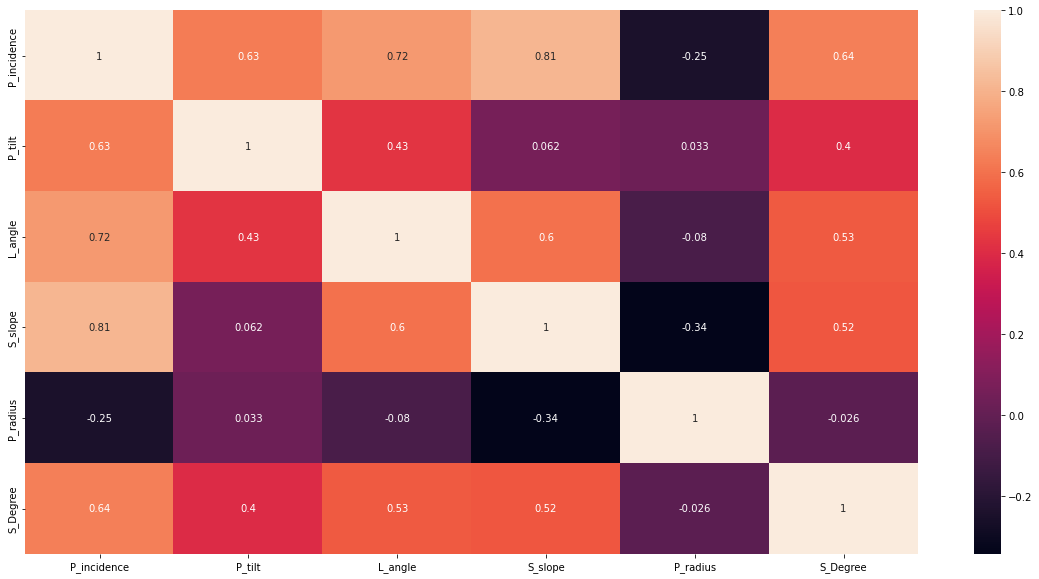

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=Dataset.corr(), annot=True, ax=ax)

__B__. Share insights on correlation. [2 Marks]
- Features having __stronger__ correlation with correlation value.


Assuming correlation > 0.6 as moderate correlation and correlation > 0.7 as strong correlation:
- `P_incidence` is __moderately positively__ correlated with `P_tilt` and `S_degree`, __strongly positively__ correlated with `S_slope` and `L_angle`
- `P_tilt` is __moderately positively__ correlated with `P_tilt` and `S_slope`
- `L_angle` is __moderately positively__ correlated with `S_slope` and __strongly positively__ correlated with `P_incidence`


The reverse also holds true, ie, `S_slope` is __strongly positively__ correlatd with `P_incidence` etc.

- Features having __weaker__ correlation with correlation value.

Assuming correlation < 0.6 as weak correlation and correlation < 0.3 as negligible correlation:
- `P_incidence` is __weakly negatively__ correlated with `P_radius` 
- `P_tilt` is __weakly positively__ correlated with `L_angle` and `P-radius` and `S_degree`
- `L_angle` is __weakly positively__ correlated with `P-tilt` and `S_degree` and __negligibly negatively__ correlated with `P_radius`
- `P_radius` is __negligibly positively__ correlated with `P_tilt` and __negligibly negative__ with `P_incidence` and `L_angle` and `S_degree` and __weakly negatively__ correlated with `S_slope`

The reverse also holds true, ie, `S_slope` is __weakly negatively__ correlatd with `P_radius` etc.

`P_radius` holds __no significant__ correlation with __any__ of the variables in the dataset

__C.__ Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

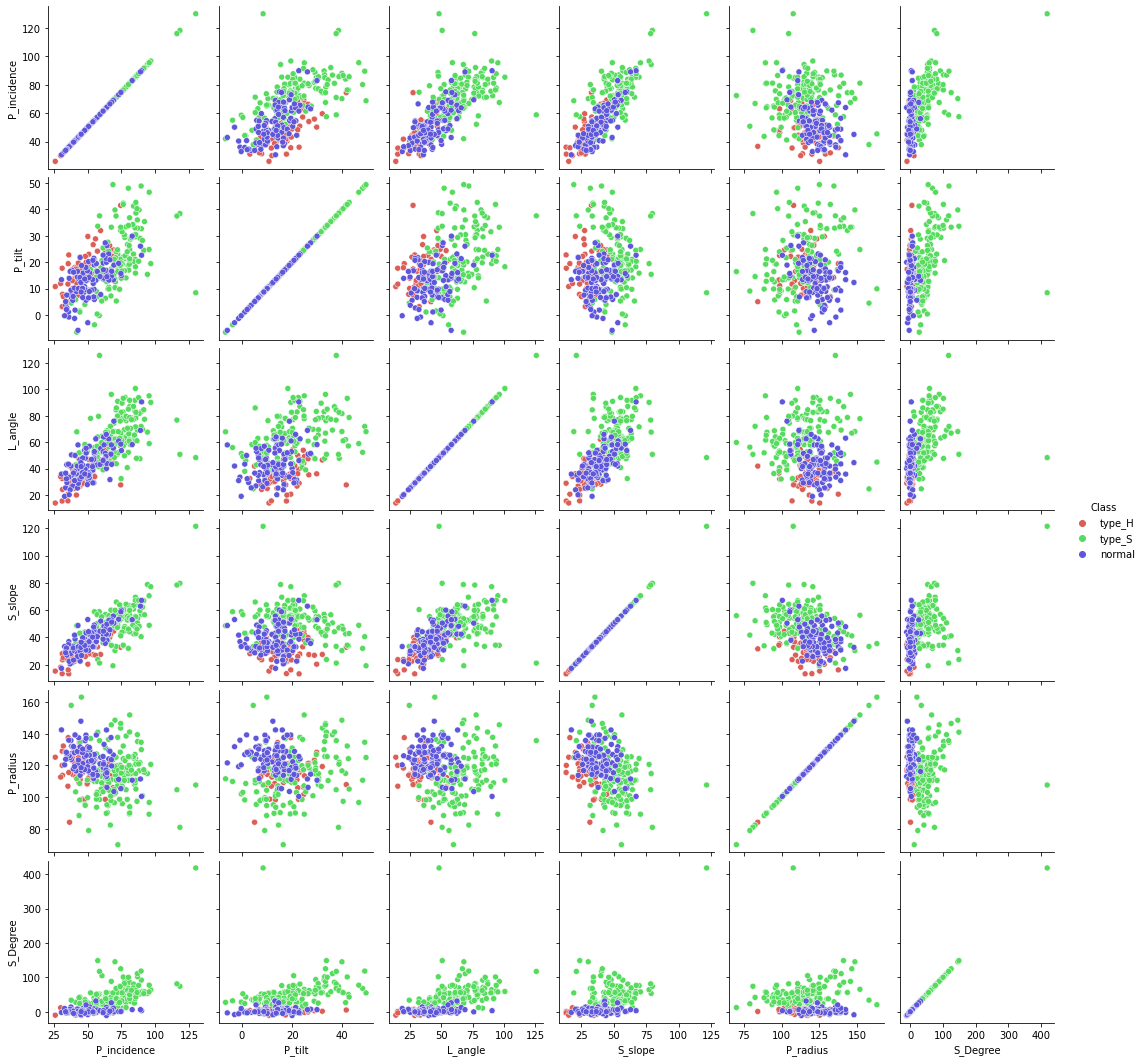

In [10]:
sns.pairplot(data = Dataset, hue="Class", diag_kind = None, palette = "hls")

- It seems it might be possible to tell whether value of `Class` is `type_S` based on the value of `S_degree` paired with the value of any other variable
- In all other cases, the data is almost homogenously distributed, leaving us unable to ascertain anything about the target variable by observation alone

__D__. Visualize a jointplot for `P_incidence` and `S_slope` and share insights. [2 Marks]

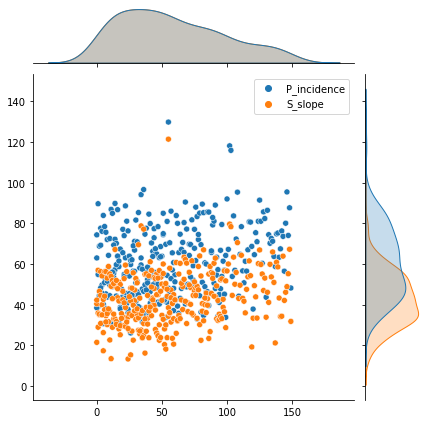

In [11]:
sns.jointplot(data = Dataset[["P_incidence", "S_slope"]])

- Minimum value of `S_slope` is lower than the minimun value of `P_incidence` along the y axis
- Maximum value of `P_incidence` is greater than the maximum value of `S_slope` along the y axis
- Both values have an equal spred along the x axis

__E__. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

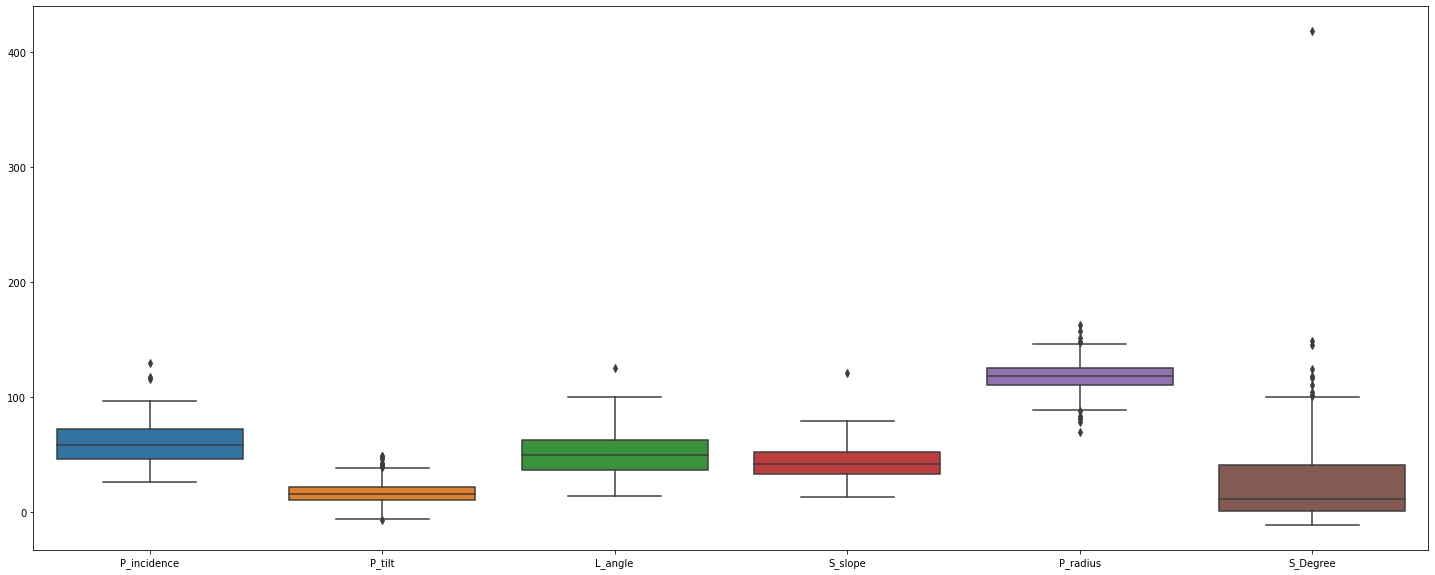

In [12]:
fig, ax = plt.subplots(figsize = (25, 10))
sns.boxplot(data = Dataset)

- There are no outliers in the lower whisker of any of the plots(except `P_tilt` and `P_radius`)
- Data in `S_degree` is right-skewed
- Except for `S_degree`, all plots' data is relatively uniformly distributed(size of box is equal above and below the 50th percentile mark)

### 4. Model Building: [6 Marks]

__A__. Split data into X and Y. [1 Marks]

In [13]:
X = Dataset.iloc[ : , : -1]
Y = Dataset.iloc[ : , -1]

In [14]:
Y.unique()

array(['type_H', 'type_S', 'normal'], dtype=object)

__B__. Split data into train and test with 80:20 proportion. [1 Marks]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

__C__. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNN_5 = KNeighborsClassifier(n_neighbors = 3, weights = "distance")
KNN_5.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

__D__. Print all the possible performance metrics for both train and test data. [2 Marks]

For __test__ data

Accuracy is :  82.26%
Confusion Matrix:
              precision    recall  f1-score   support

      normal       0.75      0.75      0.75        20
      type_H       0.54      0.64      0.58        11
      type_S       1.00      0.94      0.97        31

    accuracy                           0.82        62
   macro avg       0.76      0.77      0.77        62
weighted avg       0.84      0.82      0.83        62



0.8225806451612904

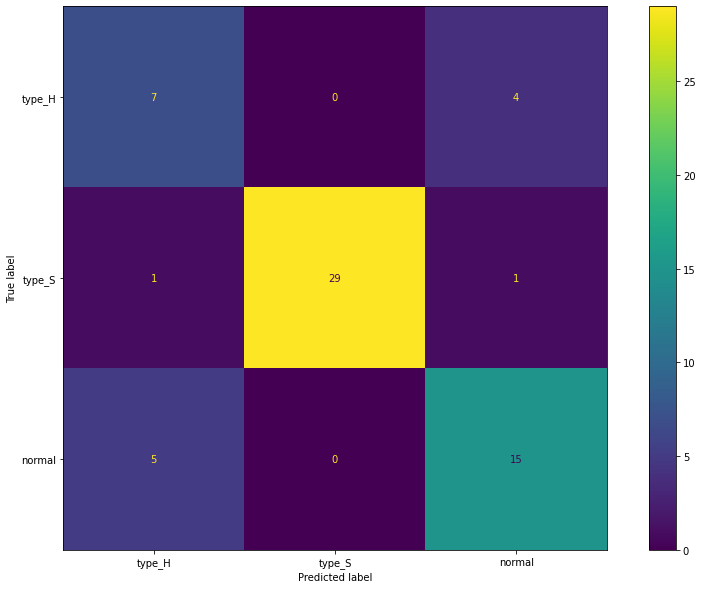

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Y_pred = KNN_5.predict(X_test)
print("Accuracy is : ", round(KNN_5.score(X_test, Y_test) * 100, 2), "\b%")
print("Confusion Matrix:")
Confusion_Matrix = confusion_matrix(Y_test, Y_pred, labels = Y.unique())
cm_plot = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_original_model = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_original_model.pop("accuracy")

For __train__ data

Accuracy is :  100.0%
Confusion Matrix:


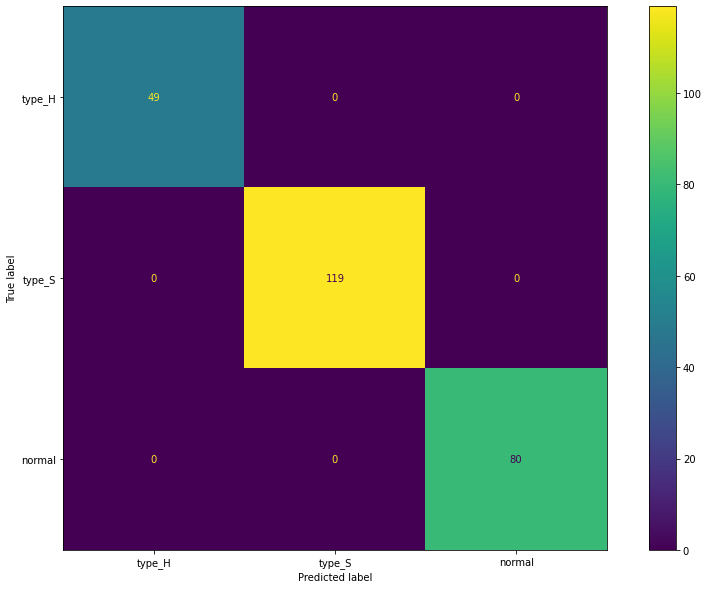

In [18]:
Y_pred = KNN_5.predict(X_train)
print("Accuracy is : ", round(KNN_5.score(X_train, Y_train) * 100, 2), "\b%")
print("Confusion Matrix:")
Confusion_Matrix = confusion_matrix(Y_train, Y_pred, labels = Y.unique())
cm_plot = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)

### 5. Performance Improvement: [4 Marks]

__A__. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

In [19]:
num_neighbors = 3
KNN = {}
max_num_neighbors = 0
max_accuracy = 0
max_accuray_num_neighbors = 0
max_accuracy_weight_func = ""
confusion_mat = None

while num_neighbors * num_neighbors < len(Dataset):
    KNN[num_neighbors] = {}
    
    for weight_func in ["uniform", "distance"]:
        KNN_ = KNeighborsClassifier(n_neighbors = num_neighbors, weights = weight_func)
        KNN_.fit(X_train, Y_train)
        KNN[num_neighbors][weight_func] = KNN_.score(X_test, Y_test)
        
        if max_accuracy < KNN[num_neighbors][weight_func]:
            max_accuracy = KNN[num_neighbors][weight_func]
            max_accuray_num_neighbors = num_neighbors
            max_accuracy_weight_func = weight_func  
            Y_pred = KNN_.predict(X_test)
            confusion_mat = confusion_matrix(Y_test, Y_pred, labels = Y.unique())

        
    num_neighbors += 2

__B__.Clearly showcase improvement in performance achieved. [1 Marks]

For Example:
- Accuracy: +15% improvement
- Precision: +10% improvement.

In [20]:
print("Highest accuracy achieved is ", round(KNN[max_accuray_num_neighbors][max_accuracy_weight_func] * 100,2), "\b%")

Highest accuracy achieved is  83.87%


In [21]:
diff = 83.87 - 82.26 #82.86 is the accuracy achieved with the previous model
relative_diff = diff / 82.26 * 100
print(round(relative_diff, 2), "% improvement")

1.96 % improvement


              precision    recall  f1-score   support

      normal       0.79      0.75      0.77        20
      type_H       0.57      0.73      0.64        11
      type_S       1.00      0.94      0.97        31

    accuracy                           0.84        62
   macro avg       0.79      0.80      0.79        62
weighted avg       0.86      0.84      0.85        62



0.8387096774193549

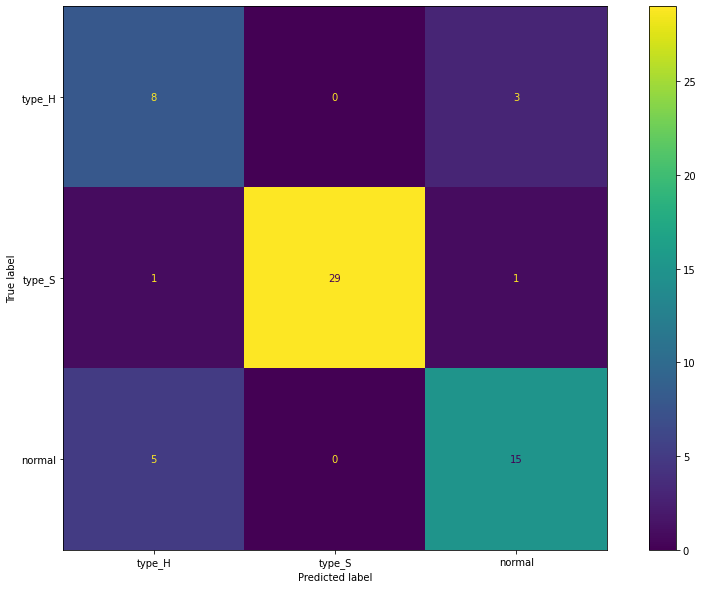

In [22]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_optimized_model = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_optimized_model.pop("accuracy")

- The confusion matrix is same except that the true_positives for `type_H` increased by 1 and correspondingly false_negative decreased by 1
- Therefore the number of false_positives for `normal` also decreased by 1

Side by side display of classification reports of both models(original and best)

__Original__
```
              precision    recall  f1-score   support

      normal       0.75      0.75      0.75        20
      type_H       0.54      0.64      0.58        11
      type_S       1.00      0.94      0.97        31

    accuracy                           0.82        62
   macro avg       0.76      0.77      0.77        62
weighted avg       0.84      0.82      0.83        62
```
__Best__
```
              precision    recall  f1-score   support

      normal       0.79      0.75      0.77        20
      type_H       0.57      0.73      0.64        11
      type_S       1.00      0.94      0.97        31

    accuracy                           0.84        62
   macro avg       0.79      0.80      0.79        62
weighted avg       0.86      0.84      0.85        62
```



In [23]:
diff_mat = {}

for label in classification_report_optimized_model.keys():
    diff_mat[label] = {}
    for metric in classification_report_optimized_model[label].keys():
        diff_mat[label][metric] = round((classification_report_optimized_model[label][metric] - classification_report_original_model[label][metric])/classification_report_optimized_model[label][metric] * 100, 2)
        
print("Improvement in performance of each metric for each label:\n\n")
for label in diff_mat.keys():

    for metric in diff_mat[label].keys():
        print(label, metric, round(diff_mat[label][metric],2), "\b%")#, end="\t\t  ")
    print("\n")

Improvement in performance of each metric for each label:


normal precision 5.0%
normal recall 0.0%
normal f1-score 2.5%
normal support 0.0%


type_H precision 5.77%
type_H recall 12.5%
type_H f1-score 8.85%
type_H support 0.0%


type_S precision 0.0%
type_S recall 0.0%
type_S f1-score 0.0%
type_S support 0.0%


macro avg precision 3.07%
macro avg recall 3.77%
macro avg f1-score 3.19%
macro avg support 0.0%


weighted avg precision 2.17%
weighted avg recall 1.92%
weighted avg f1-score 1.92%
weighted avg support 0.0%




__C__. Clearly state which parameters contributed most to improve model performance. [1 Marks]

Although the difference between the accuracies of the two models is negligible, the `type_H` classification metrics improved considerably

I believe the parameters that contributed the most to this are the number of neighbors and the weight function used

# Part B - 30 Marks
• __DOMAIN__: Banking, Marketing

• __CONTEXT__: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation
being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to
increase the conversion ratio to double digit with same budget as per last campaign.

• __DATA DICTIONARY__:
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s ixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.

• __PROJECT OBJECTIVE__: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

• __STEPS AND TASK__ [30 Marks]:

### 1. Data Understanding and Preparation: [5 Marks]

__A__. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

In [24]:
dataset_data1 = pd.read_csv("./Data1.csv")
dataset_data2 = pd.read_csv("./Data2.csv")

__B__. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

In [25]:
print("Data1 columns:\n", dataset_data1.columns)
print("Data1 shape: ", dataset_data1.shape)
print()
print("Data2 columns:\n", dataset_data2.columns)
print("Data2 shape: ", dataset_data2.shape)

Data1 columns:
 Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Data1 shape:  (5000, 8)

Data2 columns:
 Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
Data2 shape:  (5000, 7)


__C__. Merge both the Dataframes on `ID` feature to form a single DataFrame [2 Marks]

In [26]:
Data = dataset_data1.set_index("ID").join(dataset_data2.set_index("ID"), on = "ID") #Now I can't drop ID

__D__. Change Datatype of below features to `object` [1 Marks]

`CreditCard`, `InternetBanking`, `FixedDepositAccount`, `Security`, `Level`, `HiddenScore`.

[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is `int`/`float` which is not expected.]

In [27]:
types_to_change = {"CreditCard" : object, 
                   "InternetBanking": object, 
                   "FixedDepositAccount": object, 
                   "Security": object, 
                   "Level": object, 
                   "HiddenScore": object}
Data = Data.astype(types_to_change)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   object 
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   object 
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   object 
 9   FixedDepositAccount  5000 non-null   object 
 10  InternetBanking      5000 non-null   object 
 11  CreditCard           5000 non-null   object 
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 546.9+ KB


### 2. Data Exploration and Analysis: [5 Marks]

__A__. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

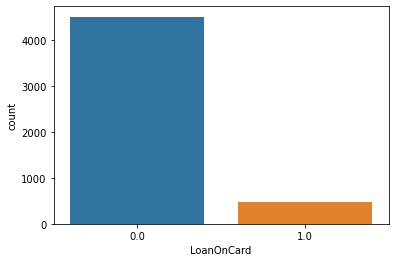

In [28]:
sns.countplot(x = "LoanOnCard", data = Data)

There are a __lot__ more records where `LoanOnCard` is 0 compared to where `LoanOnCard` is 1

__B__. Check the percentage of missing values and impute if required. [1 Marks]

In [29]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   object 
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   object 
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   object 
 9   FixedDepositAccount  5000 non-null   object 
 10  InternetBanking      5000 non-null   object 
 11  CreditCard           5000 non-null   object 
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 675.9+ KB


Percentage of missing values : 1 - (4980/5000 * 100) = __0.4%__

In [30]:
Data = Data.fillna(value = 0)

In [31]:
#Data = Data.astype({"LoanOnCard" : object})
Data.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


__C__. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

__`CustomerSince` should be >= 0__

Assuming a typing mistake, we will replace the value with its negation, ie, if value is __`x`, replace with `-x`__

In [32]:
Data = Data.where(cond = lambda x: x >= 0, other = -Data)
len(Data[ Data["CustomerSince"] < 0])

0

### 3. Data Preparation and model building: [10 Marks]

__A__. Split data into X and Y. [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [33]:
#Data = Data.drop("ID", axis = "columns")
Data = Data.drop(labels = "ZipCode", axis = "columns") #can't drop ID since I merged on it
X = Data.iloc[ : , : -1 ]
Y = Data.iloc[ : , -1 ]

__B__. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

In [34]:
#Doing it the naive way so that I can balance properly in Question E
X_train = X.iloc[0 : int(0.75 * len(X)), : ]
X_test = X.iloc[ int(0.75 * len(X)) : , : ]
Y_train = Y.iloc[0 : int(0.75 * len(Y)) ,]
Y_test = Y.iloc[ int(0.75 * len(Y)) : ,]
print(Y_train.shape, Y_test.shape)

(3750,) (1250,)


__C__. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

In [35]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver="liblinear")
logistic_regression_model.fit(X_train, Y_train)
Y_pred = logistic_regression_model.predict(X_test)

__D__. Print evaluation metrics for the model and clearly share insights. [1 Marks]

In [36]:
accuracy = logistic_regression_model.score(X_test, Y_test)
print("Accuracy is ", round(accuracy * 100, 2), "\b%") 
logistic_regression_model_report = classification_report(Y_test, Y_pred, output_dict = True)
print(classification_report(Y_test, Y_pred))

print(Y_train.value_counts())
print(Y_test.value_counts())
print(Y.value_counts())

Accuracy is  95.44%
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1146
         1.0       0.78      0.62      0.70       104

    accuracy                           0.95      1250
   macro avg       0.87      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

0.0    3374
1.0     376
Name: LoanOnCard, dtype: int64
0.0    1146
1.0     104
Name: LoanOnCard, dtype: int64
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


The classification scores of `LoanOnCard` having value `1.0` are quite lower than `LoanOnCard` having value `0.0` due to the low number of samples containing the the value of `LoanOnCard` as 1.0 (value `0.0` is nearly __8.97 times more prevalent__ than value `1.0`)

__E__. Balance the data using the right balancing technique. [2 Marks]

i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.

In [37]:
#240 = half the total num of records having LoanOnCard value = 1.0
#, so double that to ensure 50:50 split between 1.0 and 0.0 values of LoanOnCard
# meaning 240 values that have LoanOnCard = 1.0 in training set, 240 values that have LoanOnCard in testing set
#, and num of val having LoainOnCard = 1.0 is same as num of val having LoanOnCard = 0.0


#X_train_proper, X_test_proper, Y_train_proper, Y_test_proper = train_test_split(X, Y, test_size = 0.5, random_state = 0)
#print(Y_train_proper.value_counts())
#print(Y_test_proper.value_counts())
#g = Data.groupby('LoanOnCard')
temporary = Data.copy()#g.apply(lambda x: x.sample(g.size().min())).reset_index(drop = True)
LoanOnCard_1 = temporary[ temporary["LoanOnCard"] == 1.0].sample(240).reset_index(False)#.copy()#[ list(range(0, 120)) + list(range(360, 480)) , :]
LoanOnCard_0 = temporary[ temporary["LoanOnCard"] == 0.0].sample(240).reset_index(False)#.copy()
test_frame = LoanOnCard_0.merge(LoanOnCard_1, how = "outer", copy = False)#, axis = "rows")
len(test_frame[ test_frame["LoanOnCard"] == 0.0]) # 240 :D
len(test_frame[ test_frame["LoanOnCard"] == 1.0]) # 240 :D

240

Now trying to create the training set

In [38]:
train_frame = temporary[ temporary.index.isin(test_frame.ID) == False] #basically set difference                       
print(len(train_frame))
print(train_frame.shape)
len(train_frame[ train_frame["LoanOnCard"] == 1.0])

4520
(4520, 12)


240

In [39]:
X_train_balanced = train_frame.iloc[ : , : -1]
Y_train_balanced = train_frame.iloc[ : , -1 ]

X_test_balanced = test_frame.iloc[ : , 1 : -1] # to avoid "ID"
Y_test_balanced = test_frame.iloc[ : , -1]

#X_test_balanced = X_test_balanced.reset_index(drop = True)

print(X_test_balanced.shape)
print(Y_test_balanced.shape)
print(X_train_balanced.shape)
print(Y_train_balanced.shape)

assert X_test_balanced.shape[0] == Y_test_balanced.shape[0]
assert X_train_balanced.shape[0] == Y_train_balanced.shape[0]
#assert X_test_balanced.columns[:] == X_train_balanced.columns[:]
#X_test_balanced.columns
#X_train_balanced.columns

(480, 11)
(480,)
(4520, 11)
(4520,)


__F__. Again train the same previous model on balanced data. [1 Marks]

In [40]:
logistic_regression_model_balanced = LogisticRegression(solver="liblinear")
logistic_regression_model_balanced.fit(X_train_balanced, Y_train_balanced)
Y_pred_balanced = logistic_regression_model_balanced.predict(X_test_balanced)




__G__. Print evaluation metrics and clearly share differences observed. [2 Marks]

In [41]:
accuracy_balanced = logistic_regression_model_balanced.score(X_test_balanced, Y_test_balanced)
print("Accuracy is ", round(accuracy_balanced * 100, 2), "\b%") 
logistic_regression_model_report_balanced = classification_report(Y_test_balanced, Y_pred_balanced, output_dict = True)
print(classification_report(Y_test_balanced, Y_pred_balanced))

print("Train :\n", Y_train_balanced.value_counts())
print("Test: \n", Y_test_balanced.value_counts())
print(Y.value_counts())


Accuracy is  75.62%
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       240
         1.0       0.99      0.52      0.68       240

    accuracy                           0.76       480
   macro avg       0.83      0.76      0.74       480
weighted avg       0.83      0.76      0.74       480

Train :
 0.0    4280
1.0     240
Name: LoanOnCard, dtype: int64
Test: 
 0.0    240
1.0    240
Name: LoanOnCard, dtype: int64
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64


It is immediately visible that the accuracy of the new model is __far worse__ than the accuracy of the original model since the data distribution of the original dataset has been tampered with

However, the classification scores for `LoanOnCard` having value `1.0` have significantly __improved__, as expected, by increasing the presence of records that have `LoanOnCard` value as `1.0`

I do __not think__ that __shuffling__ the dataset in such a manner that the __ratio__ of the various classes of the target variable in the __test set__ is __different__ that the __ratio__ of the target variables in the __training set__ is __worth the reduction__ in overall accuracy + reduction in accuracy of the other variables that were more prevalent in the dataset, while __not improving__ the __support__ metric of the previously under-represented category, even though it makes more sense __intuitively__ that __homogenizing__ the representations of all the values in the test set __should__ lead to __better__ results.

### 4. Performance Improvement: [10 Marks]

__A__. Train a base model each for SVM, KNN. [4 Marks]

First, KNN

Accuracy is :  91.76
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1146
         1.0       0.51      0.44      0.47       104

    accuracy                           0.92      1250
   macro avg       0.73      0.70      0.71      1250
weighted avg       0.91      0.92      0.92      1250



0.9176

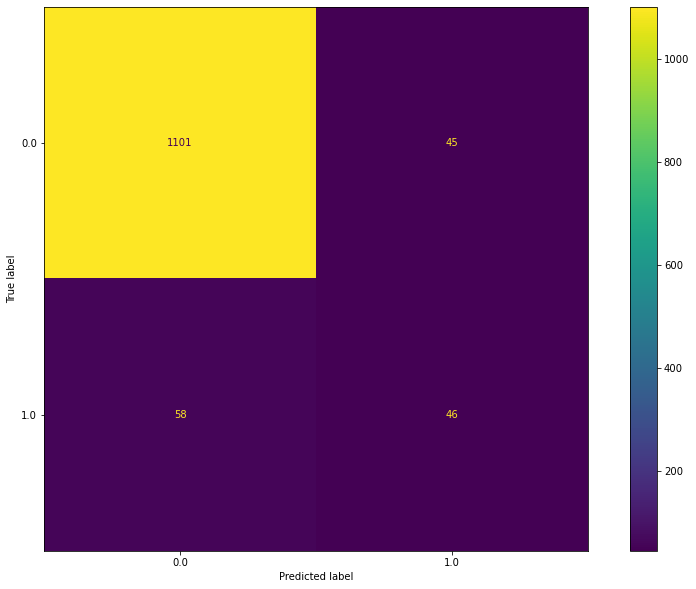

In [42]:
KNN_5 = KNeighborsClassifier(n_neighbors = 3, weights = "distance")
KNN_5.fit(X_train, Y_train)
Y_pred = KNN_5.predict(X_test)
print("Accuracy is : ", round(KNN_5.score(X_test, Y_test) * 100 , 2))
print("Confusion Matrix:")
Confusion_Matrix = confusion_matrix(Y_test, Y_pred, labels = Y.unique())
cm_plot = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_original_model_KNN_ = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_original_model_KNN_.pop("accuracy")

Now, SVM

Accuracy is :  93.84
Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1146
         1.0       0.76      0.38      0.50       104

    accuracy                           0.94      1250
   macro avg       0.86      0.68      0.74      1250
weighted avg       0.93      0.94      0.93      1250



0.9384

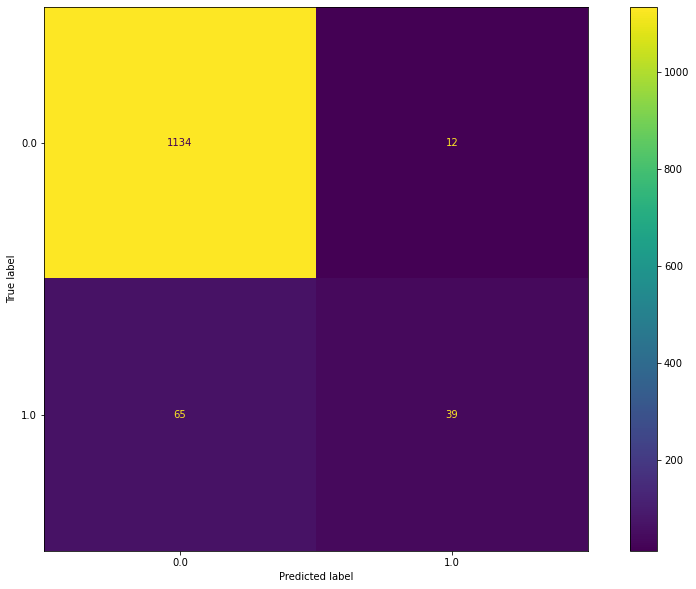

In [43]:
from sklearn import svm

Svm = svm.SVC(gamma=0.025, C=3)    
Svm.fit(X_train, Y_train)
Y_pred = Svm.predict(X_test)
print("Accuracy is : ", round(Svm.score(X_test, Y_test) * 100 , 2))
print("Confusion Matrix:")
Confusion_Matrix = confusion_matrix(Y_test, Y_pred, labels = Y.unique())
cm_plot = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_original_model_SVM_ = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_original_model_SVM_.pop("accuracy")

__B__. Tune parameters for each of the models wherever required and inalize a model. [3 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

For __KNN__

Highest accuracy achieved by KNN is  92.16%
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1146
         1.0       0.54      0.40      0.46       104

    accuracy                           0.92      1250
   macro avg       0.74      0.69      0.71      1250
weighted avg       0.91      0.92      0.92      1250

KNN optimized params are:
 5 neighbors
 distance function
Support for both classes(0.0 and 1.0) remained the same, making the optimizations basically useless


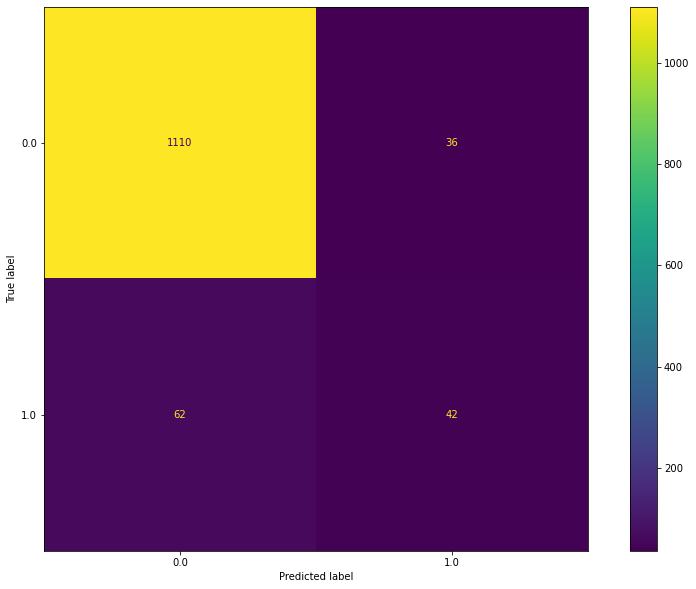

In [44]:
num_neighbors = 3
KNN = {}
max_num_neighbors = 0
max_accuracy = 0
max_accuray_num_neighbors = 0
max_accuracy_weight_func = ""
confusion_mat = None

while num_neighbors * num_neighbors < len(Dataset):
    KNN[num_neighbors] = {}
    
    for weight_func in ["uniform", "distance"]:
        KNN_ = KNeighborsClassifier(n_neighbors = num_neighbors, weights = weight_func)
        KNN_.fit(X_train, Y_train)
        KNN[num_neighbors][weight_func] = KNN_.score(X_test, Y_test)
        
        if max_accuracy < KNN[num_neighbors][weight_func]:
            max_accuracy = KNN[num_neighbors][weight_func]
            max_accuray_num_neighbors = num_neighbors
            max_accuracy_weight_func = weight_func  
            Y_pred = KNN_.predict(X_test)
            confusion_mat = confusion_matrix(Y_test, Y_pred, labels = Y.unique())

        
    num_neighbors += 2

print("Highest accuracy achieved by KNN is ", round(KNN[max_accuray_num_neighbors][max_accuracy_weight_func] * 100,2), "\b%")

cm_plot = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_optimized_model_KNN_ = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_optimized_model_KNN_.pop("accuracy")
print("KNN optimized params are:\n", max_accuray_num_neighbors, "neighbors\n", max_accuracy_weight_func, "function")
print("Support for both classes(0.0 and 1.0) remained the same, making the optimizations basically useless") 

For __SVM__

In [45]:
# gamma = 0.1 to 10
#C      = 0.01 to 100
"""
from sklearn import svm

Svm = svm.SVC(gamma=0.025, C=3)    
Svm.fit(X_train, Y_train)
Y_pred = SVM.predict(X_test)
print("Accuracy is : ", round(SVM.score(X_test, Y_test) * 100 , 2))
print("Confusion Matrix:")
Confusion_Matrix = metrics.confusion_matrix(Y_test, Y_pred, labels = Y.unique())
cm_plot = ConfusionMatrixDisplay(confusion_matrix = Confusion_Matrix, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_original_model_SVM_ = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_original_model_SVM_.pop("accuracy")
"""
import numpy as np

max_accuracy_gamma = np.float64(0)
max_accuracy_C = np.float64(0)
CONFUSION_MATRIX = None
max_accuracy = 0
SVM = {}
gamma_list = [0.1, 0.025, 1, 10, 100, 1000]#np.arange(0.5, 10, 5)
C_list = [0.01, 1, 3, 100, 10000, 1000000]#np.arange(0.01, 100, 50)

for index1 in range(0, len(gamma_list)):
    SVM[gamma_list[index1]] = {}
    print(gamma_list[index1])
    for index2 in range(0, len(C_list)):
        SVM__ = svm.SVC(gamma = gamma_list[index1], C = C_list[index2])
        SVM__.fit(X_train, Y_train)
        SVM[gamma_list[index1]][C_list[index2]] = SVM__.score(X_test, Y_test)
        
        if max_accuracy < SVM[gamma_list[index1]][C_list[index2]]:
            max_accuracy = SVM[gamma_list[index1]][C_list[index2]]
            max_accuracy_gamma = gamma_list[index1]
            max_accuracy_C = C_list[index2]
            Y_pred = SVM__.predict(X_test)
            CONFUSION_MATRIX = confusion_matrix(Y_test, Y_pred, labels = Y.unique())



0.1
0.025
1
10
100
1000


0.025
3
Highest accuracy achieved by SVM is  93.84%
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1146
         1.0       0.76      0.38      0.50       104

    accuracy                           0.94      1250
   macro avg       0.86      0.68      0.74      1250
weighted avg       0.93      0.94      0.93      1250

SVC optimized params are:
neighbors 0.025 
C:	  3


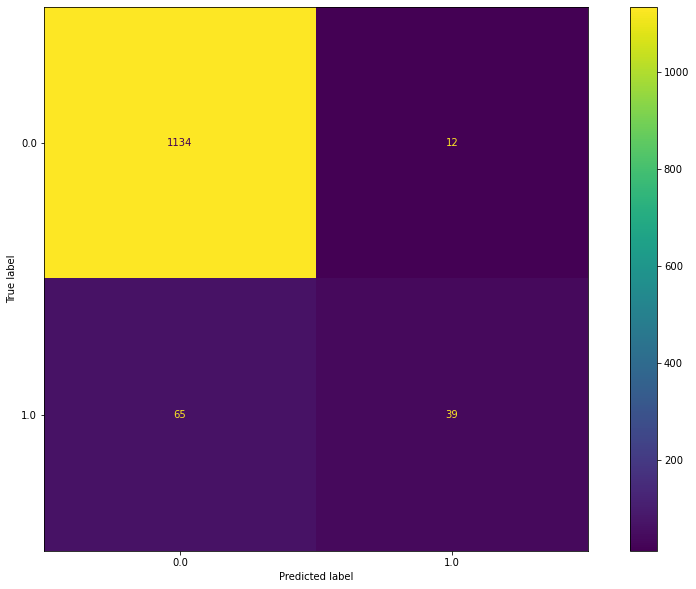

In [46]:
print(max_accuracy_gamma)
print(max_accuracy_C)
print("Highest accuracy achieved by SVM is ", round(SVM[max_accuracy_gamma][max_accuracy_C] * 100,2), "\b%")

cm_plot = ConfusionMatrixDisplay(confusion_matrix = CONFUSION_MATRIX, display_labels = Y.unique())
fig, ax = plt.subplots(figsize = (15,10))
cm_plot.plot(ax=ax)
print(classification_report(Y_test, Y_pred))
classification_report_optimized_model_SVM_ = classification_report(Y_test, Y_pred, output_dict=True)
classification_report_optimized_model_SVM_.pop("accuracy")
print("SVC optimized params are:\n", "\bneighbors", max_accuracy_gamma, "\nC:\t ", max_accuracy_C)

__C__. Print evaluation metrics for final model. [1 Marks]

In [47]:
print("Final model is still the original Logistic Regression model with parameters:")
print(logistic_regression_model.coef_)
Y_pred = logistic_regression_model.predict(X_test)
print("Here's the classification report:")
print(classification_report(Y_test, Y_pred))

Final model is still the original Logistic Regression model with parameters:
[[-3.72260602e-01  3.79496683e-01  4.84505912e-02  6.20443896e-01
   1.39346184e-01  1.56107515e+00  3.19066604e-04 -8.06025949e-01
   3.38560859e+00 -5.33067866e-01 -1.00020997e+00]]
Here's the classification report:
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1146
         1.0       0.78      0.62      0.70       104

    accuracy                           0.95      1250
   macro avg       0.87      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250



__D__. Share improvement achieved from base model to final model. [2 Marks]

There was no improvement that I could find

The default Logistic Regression model(only __changed solver__ to __liblinear__ because the default one(_lbgs_) terminated prematurely due to too many iterations) turned out to be better than any other model that I tried

Sometimes the obvious solution is the best 😟

### A multivariate plot just for satisfying curiousity to understand data distribution

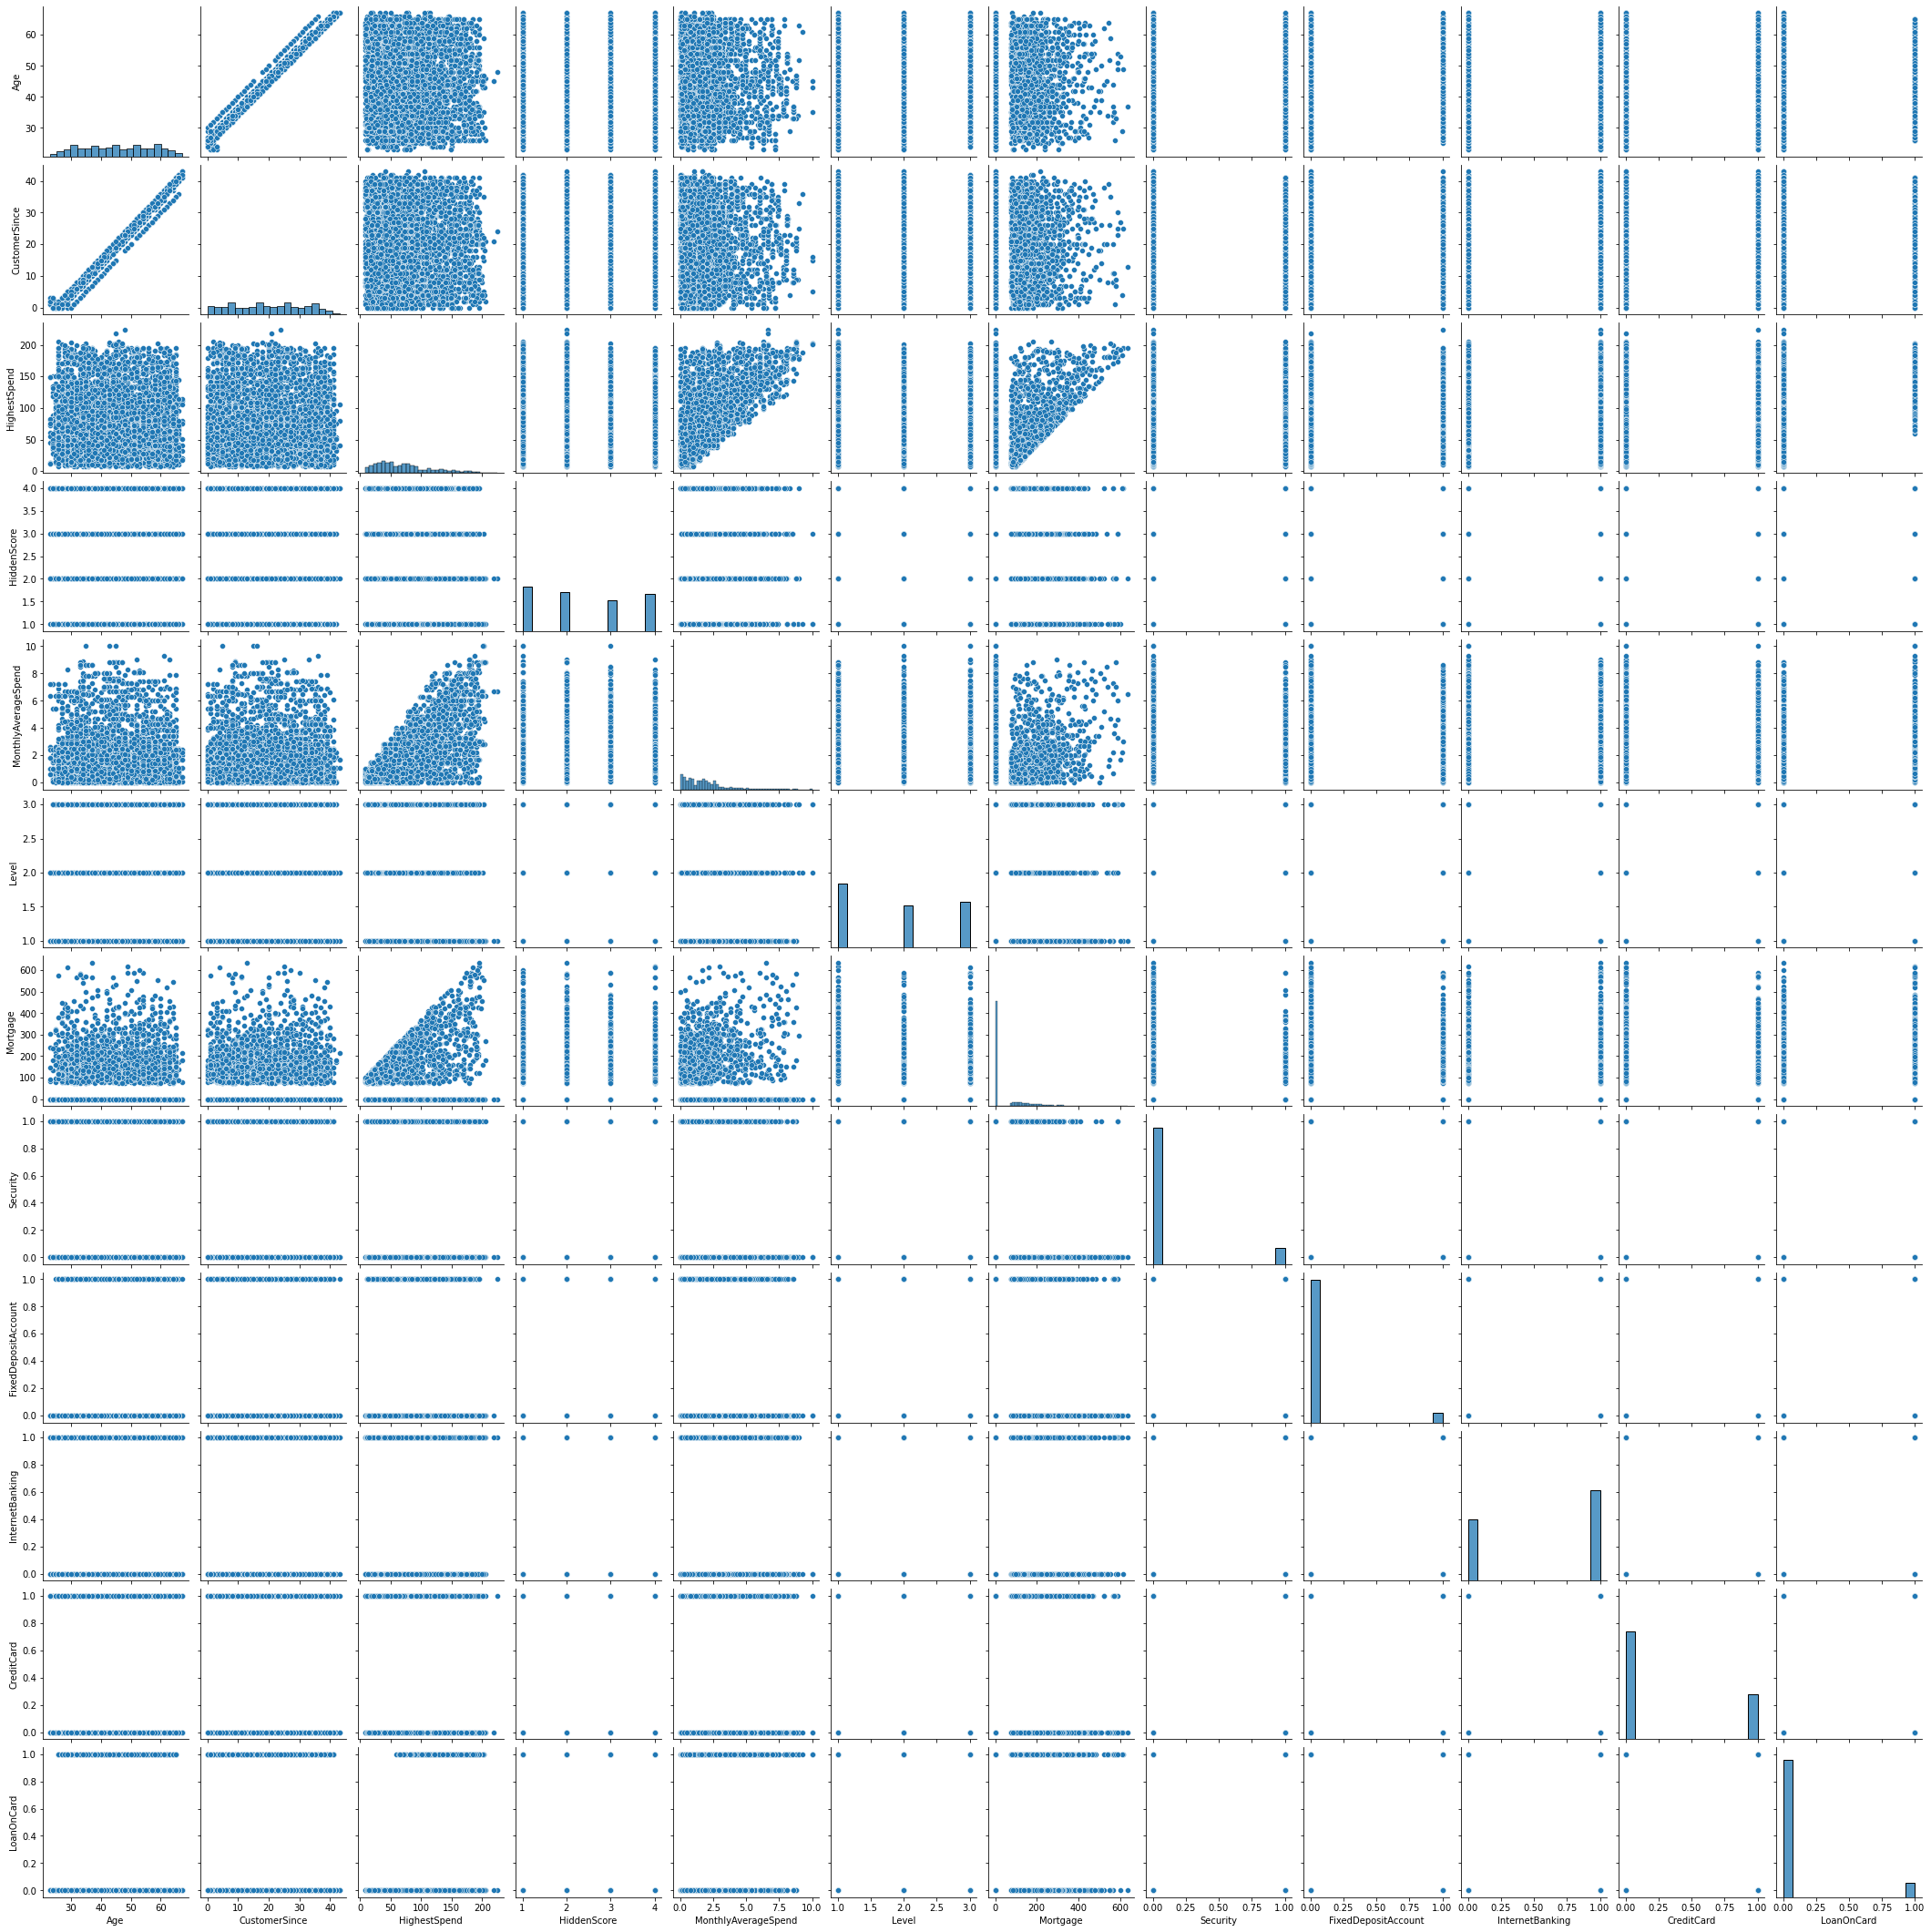

In [48]:
sns.pairplot(data = Data)